In [275]:
%matplotlib inline
import os

import numpy as np
import pandas as pd
import xarray as xr

import matplotlib
import matplotlib.pyplot as plt

from bokeh.io import output_notebook, show
from bokeh.layouts import column
from bokeh.plotting import figure

from climatools.lblnew import (pipeline, setup_bestfit)

from IPython import display


In [257]:
output_notebook()

Loading BokehJS ...

In [232]:
def fpath_output():
    return os.path.join('/chia_cluster/home/jackyu/radiation/crd',
                        'LW/examples/separate_g_groups',
                        'study__lblnew_g1_threshold',
                        'test_transf_subroutine',
                        'output_testtransf.csv')



def load_output_data():
    fpath = fpath_output()
    df = pd.read_csv(fpath, sep=r'\s+')
    return df

In [233]:
def plt_tku(df):
    p = figure(title='tku', plot_width=600, plot_height=300)
    p.circle(df['in_logdx'], df['out_tku'], color='red')
    p.line(df['in_logdx'], df['out_tku'])
    p.yaxis.axis_label = 'out_tku'
    p.xaxis.axis_label = 'in_logdx'
    return p



def plt_slope(df):
    p = figure(title='slope', plot_width=600, plot_height=300)
    p.square(df['in_logdx'], df['out_tku_slope'], color='red')
    p.line(df['in_logdx'], df['out_tku_slope'])
    p.yaxis.axis_label = 'out_tku_slope' 
    p.xaxis.axis_label = 'in_logdx'
    return p



def make_fig(df):
    p_tku = plt_tku(df)
    p_slope = plt_slope(df)
    p = column(p_tku, p_slope)
    return p

In [242]:


def param_n2o_band3a():
    return {'atmpro': 'mls',
 'band': '3a',
 'commitnumber': '431ea63',
 'conc': 3.2e-07,
 'dv': 0.005,
 'klin': 2.22e-20,
 'molecule': 'n2o',
 'ng_adju': [0, 0],
 'ng_refs': [1, 2],
 'nv': 200,
 'option_compute_btable': 0,
 'option_compute_ktable': 0,
 'option_wgt_flux': 1,
 'option_wgt_k': 1,
 'ref_pts': [(1, 250), (500, 250)],
 'tsfc': 294,
 'vmax': 620,
 'vmin': 540,
 'w_diffuse': [(1.8,), (1.66, 1.8)],
 'wgt': [(0.9,), (0.5, 0.95)]}


def load_dtku():
    dir_fortran = pipeline.get_dir_case(param=param_n2o_band3a(),
                                        setup=setup_bestfit)

    fpath_dtku = os.path.join(dir_fortran, 'debug_dtku.dat')
    df = pd.read_csv(fpath_dtku, sep=r'\s+')
    df.to_csv('debug_dtku.csv')
    df = df.set_index(['i', 'j', 'ig'])
    ds = xr.Dataset.from_dataframe(df)
    return ds


def plt_tku_dtku():
    
    matplotlib.rcParams.update({'lines.linewidth': 2.5})
    
    ds = load_dtku()
    
    fig, axs = plt.subplots(nrows=ds.dims['i'], ncols=ds.dims['ig'],
                            figsize=(20, ds.dims['i'] * 5),
                            sharey=True,)

    for idx_i, i in enumerate(ds.coords['i']):
        for idx_ig, ig in enumerate(ds.coords['ig']):
            ax = axs[idx_i, idx_ig]
            ds.sel(i=i).sel(ig=ig)\
            .to_dataframe()\
            .drop(['i', 'ig', 'dx', 'tku'], axis=1)\
            .plot(ax=ax)
            
            ax.text(x=.5, y=.5, 
                    s='i = {}; ig = {}'.format(i.values, ig.values), 
                   transform=ax.transAxes)
            ax.grid(b=True)
    
    return fig


In [287]:
def flux_trans1(t):
    dx = 0.001
    nx = 1000
    x = dx * np.arange(nx + 1)
    
    return 2 * dx * np.sum(np.exp(- t / x) * x)


def flux_trans2(t):
    dx = 0.001
    nx = 1000
    x = dx * np.arange(nx + 1)
    
    return dx**2 * np.sum(np.exp(- t / x))


def script_transfs():
    ts = [.01, .015, 1.]
    
    s1 = "$\nu$"
    display.display(display.Markdown())

In [288]:

print(np.vectorize(flux_trans1)(ts))
print(np.vectorize(flux_trans2)(ts))



[ 0.98154334  0.97213896  0.21975194]
[ 0.00095017  0.00093104  0.00014868]


/chia_cluster/home/jackyu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/chia_cluster/home/jackyu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


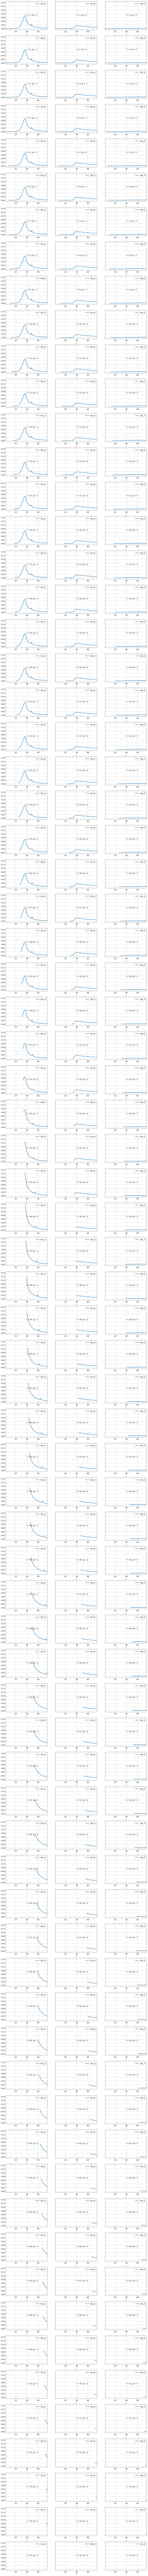

In [274]:
fig = plt_tku_dtku()
display.display(fig)
plt.close()

In [259]:
plt.subplots?

In [180]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')
